In [70]:
import numpy as np
import matplotlib.pyplot as plt

In [71]:
with open('results.csv','r') as f:
    lines = f.readlines()
    
info = {}
for l in lines:
    arr = l.split(',')
    arr = arr[0].split('_') + arr[1:]
    if arr[0] not in info:
        info[arr[0]] = {}
    if arr[1] not in info[arr[0]]:
        info[arr[0]][arr[1]] = {}
    if arr[2] not in info[arr[0]][arr[1]]:
        info[arr[0]][arr[1]][arr[2]] = []
    info[arr[0]][arr[1]][arr[2]].append(float(arr[3]))

In [72]:
print(info.keys())
print(info['./sgemm'].keys())
print(info['./sgemm']['2'].keys())

dict_keys(['./sgemm', './sgemm-tiled'])
dict_keys(['2', '4', '1', '128', '8', '16', '64', '32'])
dict_keys(['2', '4', '8', '16', '32', '64', '128', '256', '512', '1024', '2048', '4096', '8192'])


In [73]:
for a in info.keys():
    for b in info[a].keys():
        for c in info[a][b].keys():
            info[a][b][c] = np.mean(info[a][b][c])

In [74]:
vtimes = {}
for k in info['./sgemm'].keys():
    vtimes[k] = []
    for a in info['./sgemm'][k].keys():
        vtimes[k].append(info['./sgemm'][k][a])

In [75]:
keys = sorted([int(a) for a in vtimes.keys()])
print(keys)

[1, 2, 4, 8, 16, 32, 64, 128]


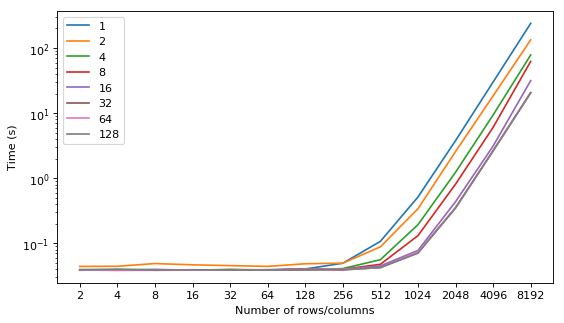

In [76]:
plt.figure(num=None, figsize=(8, 4.5), dpi=80, facecolor='w', edgecolor='k')
for k in keys:
    plt.plot(vtimes[str(k)],label=k)
plt.legend()
plt.yscale('log')
plt.xticks(range(len(vtimes['4'])), [2**(i+1) for i in range(len(vtimes['4']))])
plt.ylabel("Time (s)")
plt.xlabel("Number of rows/columns")
plt.show()

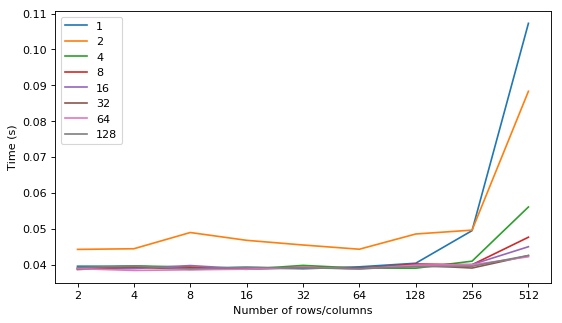

In [77]:
plt.figure(num=None, figsize=(8, 4.5), dpi=80, facecolor='w', edgecolor='k')
for k in keys:
    plt.plot(vtimes[str(k)][:9],label=k)
plt.legend()
#plt.yscale('log')
plt.xticks(range(len(vtimes['4'][:9])), [2**(i+1) for i in range(len(vtimes['4'][:9]))])
plt.ylabel("Time (s)")
plt.xlabel("Number of rows/columns")
plt.show()

In [78]:
stimes = {}
for k in info['./sgemm-tiled'].keys():
    stimes[k] = []
    for a in info['./sgemm-tiled'][k].keys():
        stimes[k].append(info['./sgemm-tiled'][k][a])

In [79]:
keys = sorted([int(a) for a in stimes.keys()])
print(keys)

[1, 2, 4, 8, 16, 32]


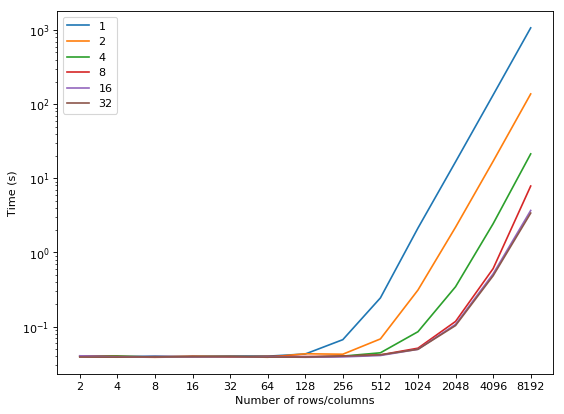

In [80]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
for k in keys:
    plt.plot(stimes[str(k)],label=k)
plt.legend()
plt.yscale('log')
plt.xticks(range(len(stimes['4'])), [2**(i+1) for i in range(len(stimes['4']))])
plt.ylabel("Time (s)")
plt.xlabel("Number of rows/columns")
plt.show()

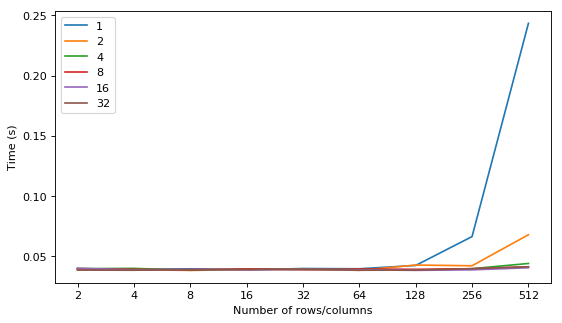

In [81]:
plt.figure(num=None, figsize=(8, 4.5), dpi=80, facecolor='w', edgecolor='k')
for k in keys:
    plt.plot(stimes[str(k)][:9],label=k)
plt.legend()
#plt.yscale('log')
plt.xticks(range(len(stimes['4'][:9])), [2**(i+1) for i in range(len(stimes['4'][:9]))])
plt.ylabel("Time (s)")
plt.xlabel("Number of rows/columns")
plt.show()

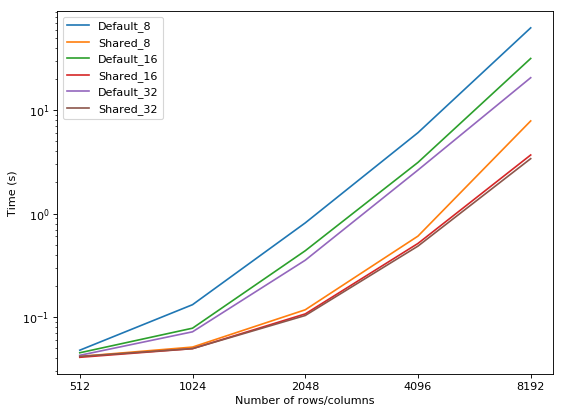

In [82]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
for k in keys[-3:]:
    plt.plot(vtimes[str(k)][-5:], label = "Default_" + str(k))
    plt.plot(stimes[str(k)][-5:], label = "Shared_" + str(k))
plt.legend()
plt.yscale('log')
plt.xticks(range(len(stimes['4'][-5:])), [2**(i+9) for i in range(len(stimes['4'][-5:]))])
plt.ylabel("Time (s)")
plt.xlabel("Number of rows/columns")
plt.show()